<a href="https://colab.research.google.com/github/wanessaneves/Projetos-DataAnalytics/blob/main/Case_Imoveis_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import scipy as sns
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
dados = pd.read_csv('/content/desafio_01_preco_imoveis230209164627-230918-093224.csv')

In [ ]:
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [ ]:
dados.shape

(21613, 19)

In [ ]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


##Sumário:
* **id**: código identificador do imóvel
* **date**: data em que o imóvel foi cadastrad
* **price**: preço do imóvel
* **bedrooms**: número de quartos
* **bathrooms**: número de banheiros
* **sqft_living**: tamanho do imóvel (dentro da casa)
* **sqft_lot**: tamanho do lote / terreno
* **floors**: andares
* **waterfront**: flag se o imóvel tem vista para o mar. 1 caso positivo, 0 caso contrário.
* **view**: indica o número de quartos com vista.
* **condition**: condição do imóvel, escala de 1 a 5
* **grade**: nota do imóvel
* **sqft_above**: tamanho da casa acima do solo (excluindo porão
* **sqft_basement**: tamanho do porão
* **yr_built**: ano em que a casa foi construída
* **yr_renovated**: ano em que a casa foi renovada
* **zipcode**: "CEP" do imóvel
* **lat**: latitude do imóvel
* **long**: longitude do imóvel

In [ ]:
dados.corr().round(2)

<ipython-input-45-22ad10769b43>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.corr().round(2)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11


### 1 - Analise a correlação de todas as variáveis com o preço do imóvel. Quais variáveis são mais correlacionadas? Quais são menos correlacionadas?

###Resposta:

####As variáveis mais correlacionadas são:
**sqft_living**: tamanho do imóvel (dentro da casa), apresentando uma correlação de *0.702035*, ou de aproximadamente *70%*. Em seguida temos a variável **grade**: nota do imóvel, com uma correlação de aproximadamente *67%*; a variável **sqft_above**: tamanho da casa acima do solo (excluindo porão) apresenta uma correlação de aproximadamente *60,5%*; a variável **bathrooms**: número de banheiros possui uma correlação de aproximadamente *53%*;

####As variáveis menos correlacionadas são:
**long**: longitude do imóvel, com uma correlação de *2%*; a variável **zipcode**: "CEP" do imóvel com aproximadamente *5%* de correlação; a variável **yr_built**: ano em que a casa foi construída com *5%* de correlação; a variável **condition**: condição do imóvel, escala de 1 a 5, com *3,6%*; e por fim a variável **sqft_lot**: tamanho do lote / terreno, apresentando uma correlação de aproximadamente *9%*.



### 2 - Para as top 5 variáveis mais correlacionadas com o preço:
####1. plote as suas distribuições (histograma e boxplot)
####2. plote o scatterplot (gráfico de dispersão), contendo preço no eixo Y e a variável correlacionada no eixo X.
####3. para cada uma das 5 variáveis faça uma regressão linear simples sendo preciso a variável resposta (y) e interprete os resultados.

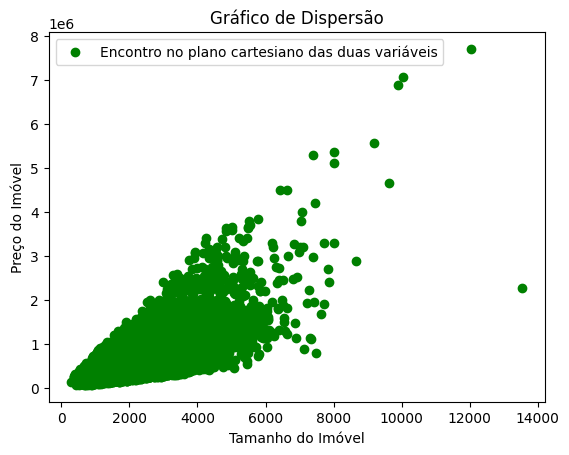

In [ ]:
#2.1
#sqft_living: tamanho do imóvel (dentro da casa)
#scatterplot
plt.scatter(x=dados['sqft_living'], y=dados['price'], label='Encontro no plano cartesiano das duas variáveis', color='green', marker='o')
plt.xlabel('Tamanho do Imóvel')
plt.ylabel('Preço do Imóvel')
plt.title('Gráfico de Dispersão')
plt.legend()
plt.show()

<Axes: title={'center': 'Box plot'}, xlabel='Tamanho do Imóvel'>

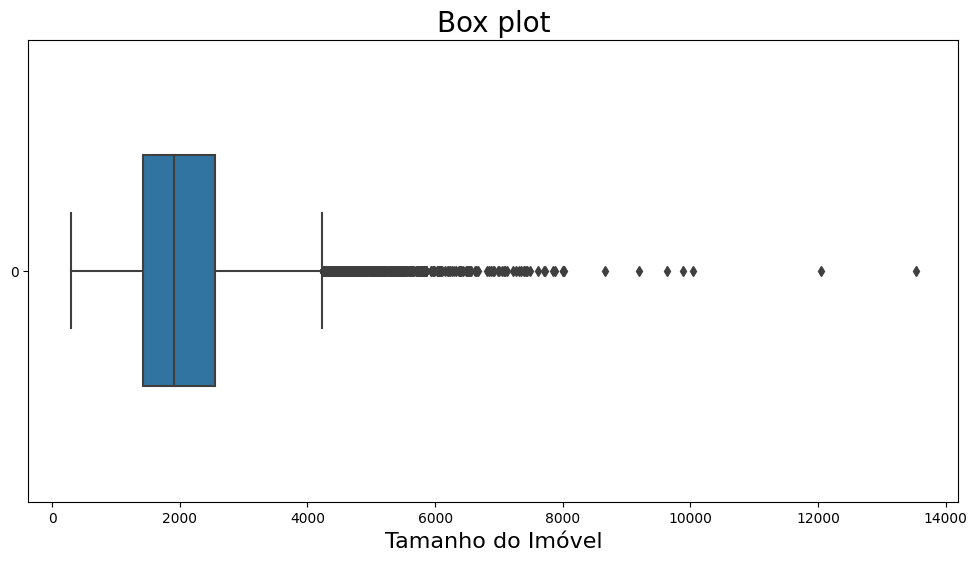

In [ ]:
ax = sns.boxplot(data=dados['sqft_living'], orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Tamanho do Imóvel', fontsize=16)
ax

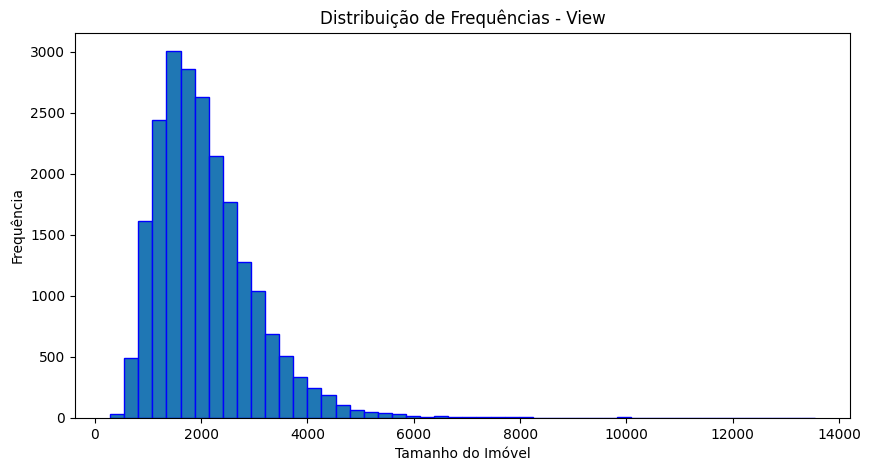

In [ ]:
#plotando gráfico de distribuição de frequência
plt.figure(figsize=(10, 5)),
plt.hist(dados['sqft_living'], bins=50, edgecolor='b')
plt.xlabel('Tamanho do Imóvel')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequências - View')
plt.show()

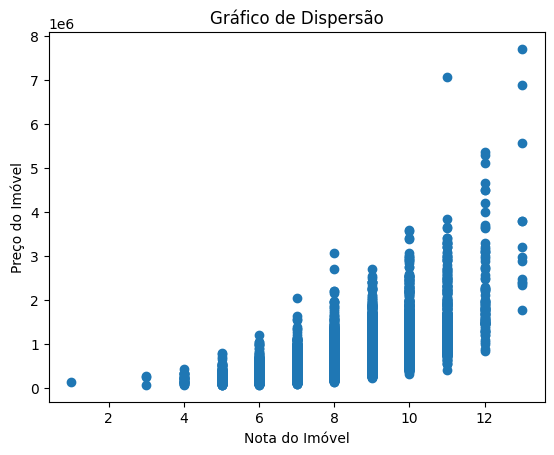

In [ ]:
#2.1
#sqft_living: tamanho do imóvel (dentro da casa)
#scatterplot
plt.scatter(dados['grade'], dados['price'])
plt.xlabel('Nota do Imóvel')
plt.ylabel('Preço do Imóvel')
plt.title('Gráfico de Dispersão')
plt.show()

<Axes: title={'center': 'Box plot'}, xlabel='Nota do Imóvel'>

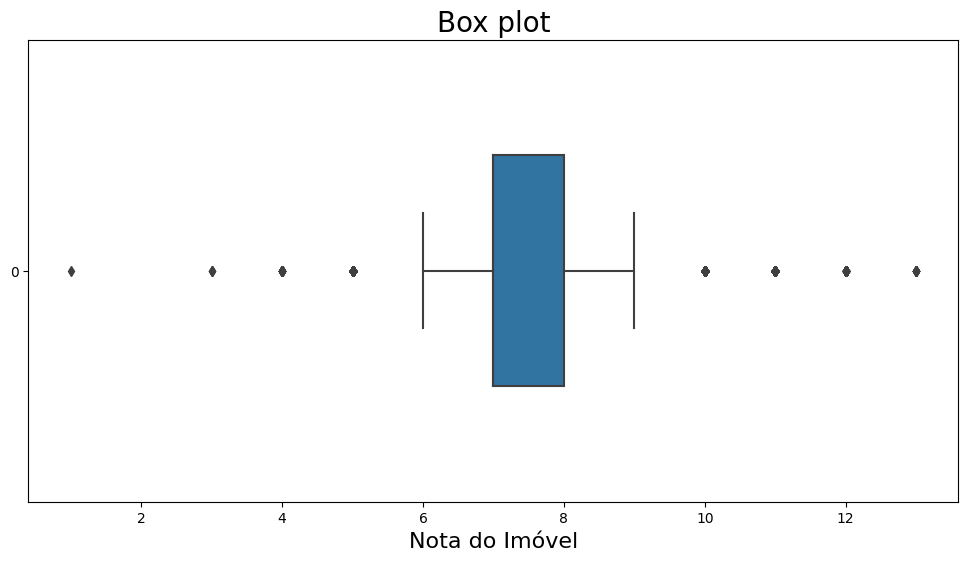

In [ ]:
ax = sns.boxplot(data=dados['grade'], orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Nota do Imóvel', fontsize=16)
ax

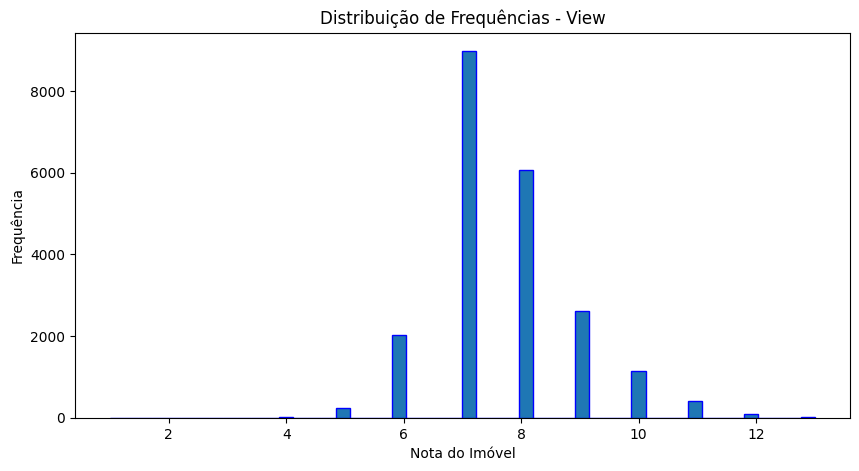

In [ ]:
#plotando gráfico de distribuição de frequência
plt.figure(figsize=(10, 5)),
plt.hist(dados['grade'], bins=50, edgecolor='b')
plt.xlabel('Nota do Imóvel')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequências - View')
plt.show()

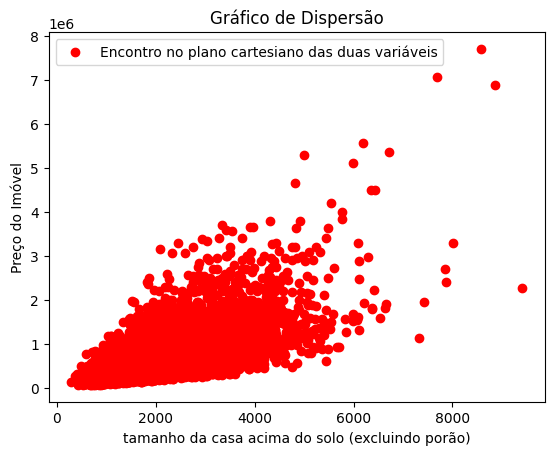

In [ ]:
#2.1
#sqft_living: tamanho do imóvel (dentro da casa)
#scatterplot
plt.scatter(x=dados['sqft_above'], y=dados['price'], label='Encontro no plano cartesiano das duas variáveis', color='red', marker='o')
plt.xlabel('tamanho da casa acima do solo (excluindo porão)')
plt.ylabel('Preço do Imóvel')
plt.title('Gráfico de Dispersão')
plt.legend()
plt.show()

<Axes: title={'center': 'Box plot'}, xlabel='tamanho da casa acima do solo (excluindo porão)'>

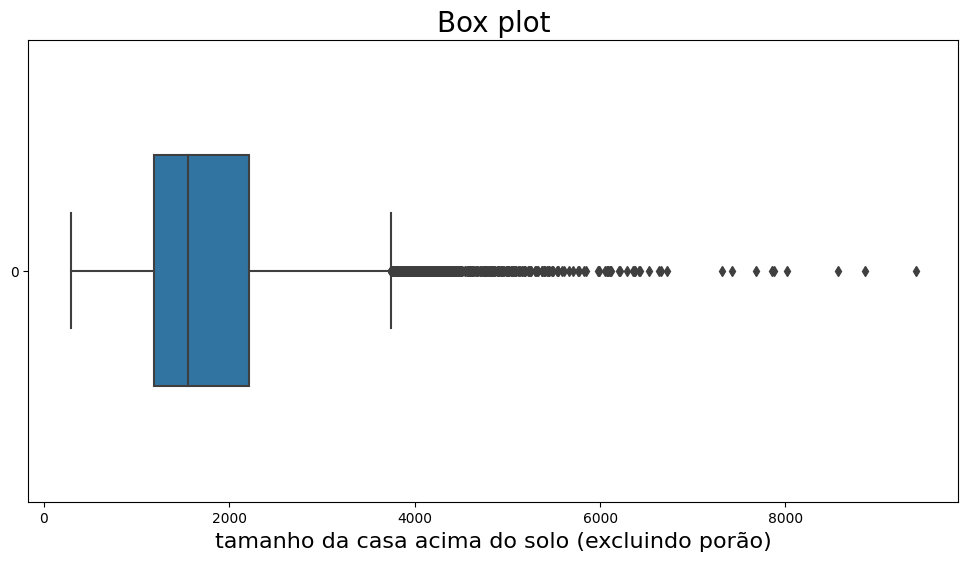

In [ ]:
ax = sns.boxplot(data=dados['sqft_above'], orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('tamanho da casa acima do solo (excluindo porão)', fontsize=16)
ax

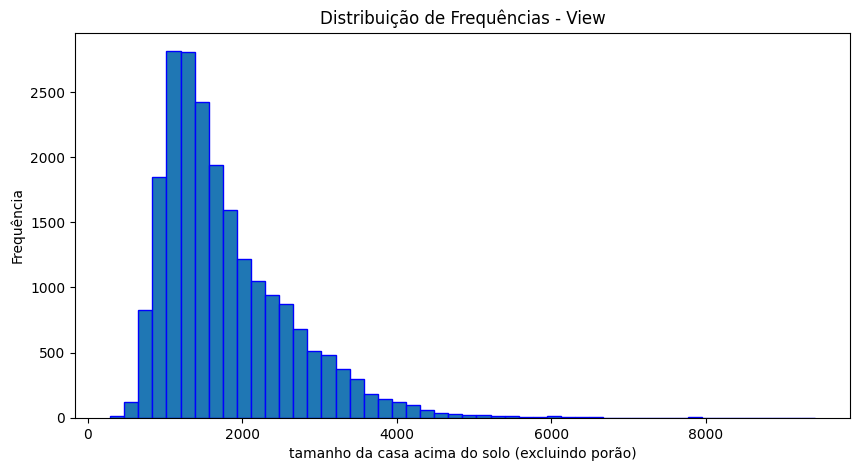

In [ ]:
#plotando gráfico de distribuição de frequência
plt.figure(figsize=(10, 5)),
plt.hist(dados['sqft_above'], bins=50, edgecolor='b')
plt.xlabel('tamanho da casa acima do solo (excluindo porão)')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequências - View')
plt.show()

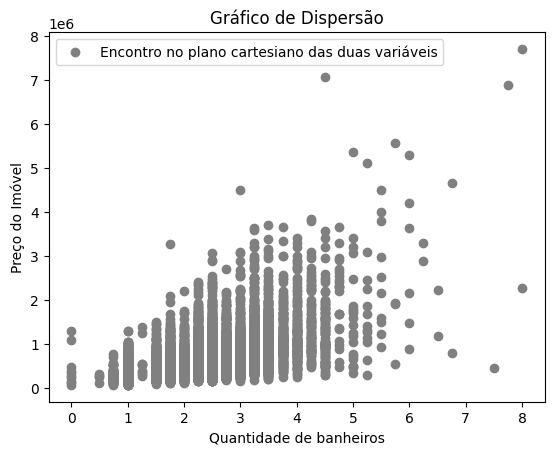

In [ ]:
#2.1
#sqft_living: tamanho do imóvel (dentro da casa)
#scatterplot
plt.scatter(x=dados['bathrooms'], y=dados['price'], label='Encontro no plano cartesiano das duas variáveis', color='gray', marker='o')
plt.xlabel('Quantidade de banheiros')
plt.ylabel('Preço do Imóvel')
plt.title('Gráfico de Dispersão')
plt.legend()
plt.show()

<Axes: title={'center': 'Box plot'}, xlabel='Quantidade de banheiros'>

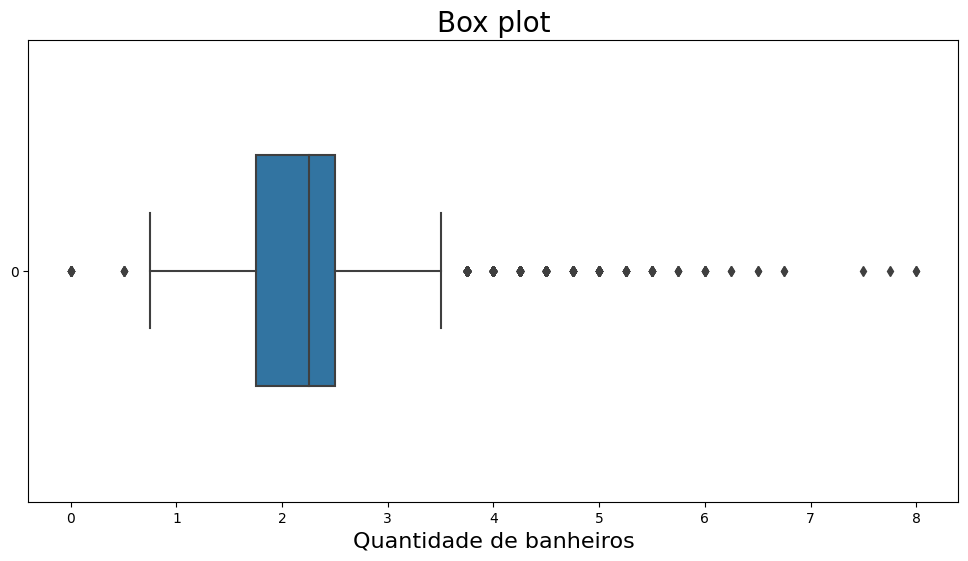

In [ ]:
ax = sns.boxplot(data=dados['bathrooms'], orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Quantidade de banheiros', fontsize=16)
ax

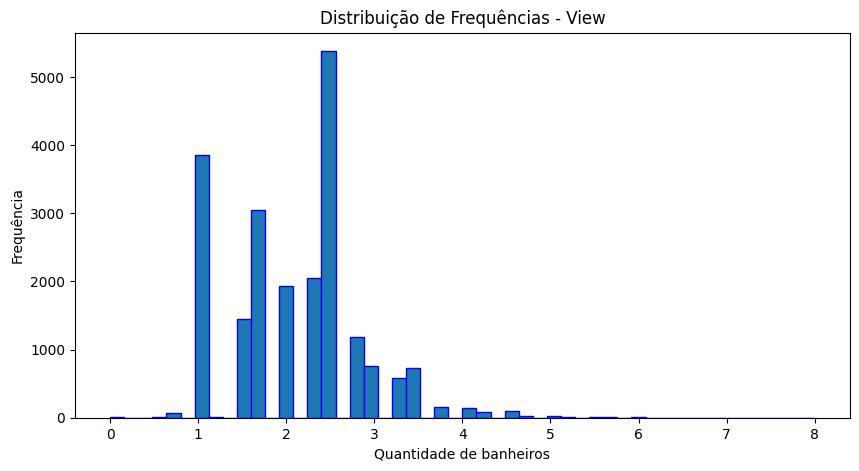

In [ ]:
#plotando gráfico de distribuição de frequência
plt.figure(figsize=(10, 5)),
plt.hist(dados['bathrooms'], bins=50, edgecolor='b')
plt.xlabel('Quantidade de banheiros')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequências - View')
plt.show()

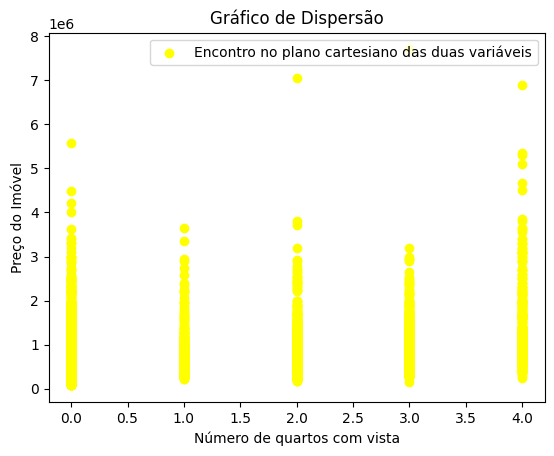

In [ ]:
#2.1
#sqft_living: tamanho do imóvel (dentro da casa)
#scatterplot
plt.scatter(x=dados['view'], y=dados['price'], label='Encontro no plano cartesiano das duas variáveis', color='yellow', marker='o')
plt.xlabel('Número de quartos com vista')
plt.ylabel('Preço do Imóvel')
plt.title('Gráfico de Dispersão')
plt.legend()
plt.show()

<Axes: title={'center': 'Box plot'}, xlabel='Número de quartos com vista'>

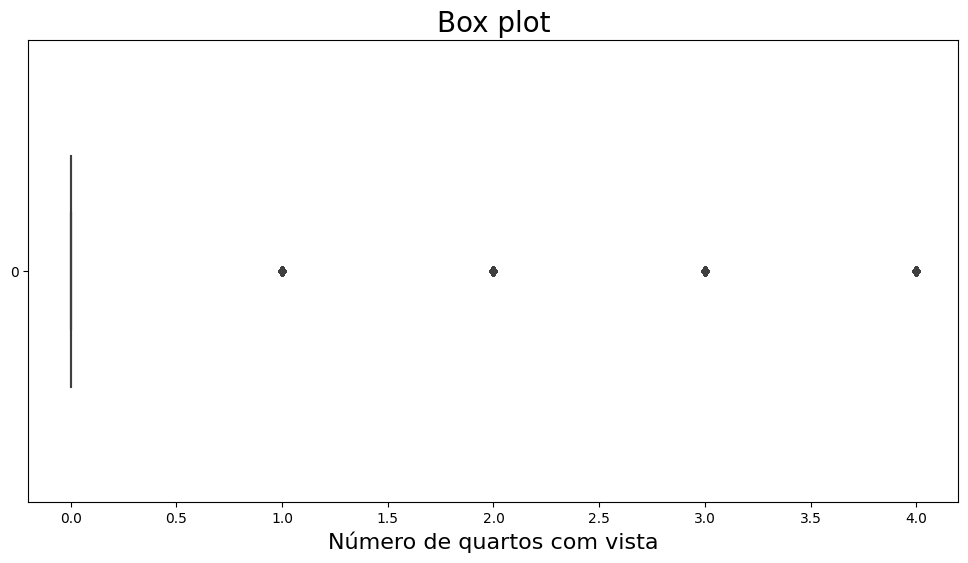

In [ ]:
ax = sns.boxplot(data=dados['view'], orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Número de quartos com vista', fontsize=16)
ax

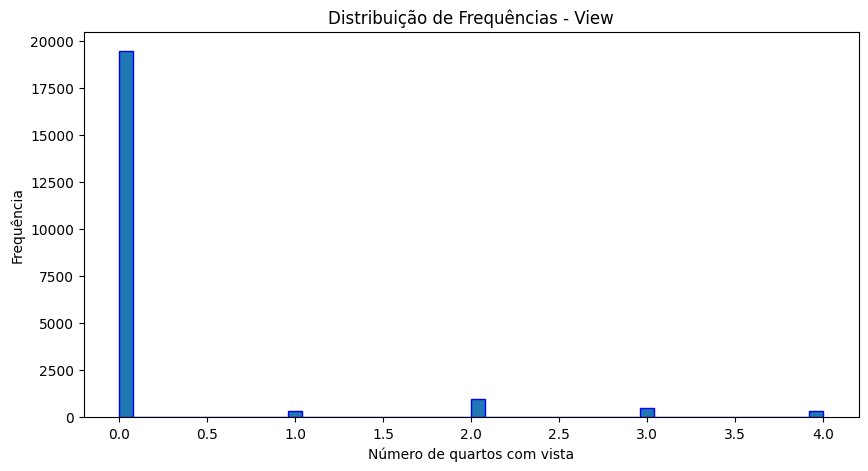

In [ ]:
#plotando gráfico de distribuição de frequência
plt.figure(figsize=(10, 5)),
plt.hist(dados['view'], bins=50, edgecolor='b')
plt.xlabel('Número de quartos com vista')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequências - View')
plt.show()







###3. para cada uma das 5 variáveis faça uma regressão linear simples sendo preço a variável resposta (y) e interprete os resultados.

In [ ]:
import statsmodels.api as sm

In [ ]:
Y = dados.price
X = sm.add_constant(dados.sqft_living)

In [ ]:
Y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [ ]:
X.head()

,const,sqft_living
0,1.0,1180
1,1.0,2570
2,1.0,770
3,1.0,1960
4,1.0,1680


In [ ]:
resultado_regressao = sm.OLS(Y, X).fit()

In [ ]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:38:45   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      

___

In [ ]:
Y = dados.price
X = sm.add_constant(dados.grade)

In [ ]:
Y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [ ]:
X.head()

,const,grade
0,1.0,7
1,1.0,7
2,1.0,6
3,1.0,7
4,1.0,8


In [ ]:
resultado_regressao = sm.OLS(Y, X).fit()

In [ ]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.736e+04
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:38:45   Log-Likelihood:            -3.0123e+05
No. Observations:               21613   AIC:                         6.025e+05
Df Residuals:                   21611   BIC:                         6.025e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.056e+06   1.23e+04    -86.166      0.0

___

In [ ]:
Y = dados.price
X = sm.add_constant(dados.sqft_above)

In [ ]:
resultado_regressao = sm.OLS(Y, X).fit()

In [ ]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                 1.251e+04
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:38:45   Log-Likelihood:            -3.0267e+05
No. Observations:               21613   AIC:                         6.053e+05
Df Residuals:                   21611   BIC:                         6.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.995e+04   4729.812     12.676      0.0

___

In [ ]:
Y = dados.price
X = sm.add_constant(dados.bathrooms)

In [ ]:
X.head()

,const,bathrooms
0,1.0,1.00
1,1.0,2.25
2,1.0,1.00
3,1.0,3.00
4,1.0,2.00


In [ ]:
resultado_regressao = sm.OLS(Y, X).fit()

In [ ]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     8229.
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:38:45   Log-Likelihood:            -3.0412e+05
No. Observations:               21613   AIC:                         6.082e+05
Df Residuals:                   21611   BIC:                         6.083e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.071e+04   6210.669      1.724      0.0

___

In [ ]:
Y = dados.price
X = sm.add_constant(dados.view)

In [ ]:
X.head()

,const,view
0,1.0,0
1,1.0,0
2,1.0,0
3,1.0,0
4,1.0,0


In [ ]:
resultado_regressaoo = sm.OLS(Y,X).fit()

In [ ]:
print(resultado_regressaoo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     4050.
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:38:45   Log-Likelihood:            -3.0575e+05
No. Observations:               21613   AIC:                         6.115e+05
Df Residuals:                   21611   BIC:                         6.115e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.955e+05   2396.476    206.759      0.0